# Plots the outlier-correction subfigure for QC paper
- comment out the 'outlier heatmaps' because they take too long to make. 

In [1]:
%matplotlib inline

import matplotlib
matplotlib.use('Agg')

from matplotlib import rc
rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

import matplotlib.patches as patches
from collections import OrderedDict, defaultdict
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4)

from tqdm import tnrange, tqdm_notebook
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


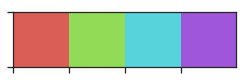

In [2]:

sns.palplot(sns.color_palette("hls", 4))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[9], 'black']

In [3]:
import matplotlib

def plot_heatmap(df, font_size=8):
    sns.set(font_scale=1)
    r1 = df.iloc[:,:350]
    r2 = df.iloc[:,350:700]
    r3 = df.iloc[:,700:1050]
    r4 = df.iloc[:,1050:]
    vmin = min(df.min())
    vmax = max(df.max())
    regions = [r1, r2, r3, r4]

    gs_hm = gridspec.GridSpec(
                ncols=4, nrows=1, width_ratios=[1, 1, 1, 1]
    )
    f = plt.figure(figsize=(4, 2))
    plot_axs = []
    
    for i in range(0, 4):
        plot_axs.append(f.add_subplot(gs_hm[i]))
        
        if i < 3:
            """
            plt.pcolor(
                regions[i],
                vmin=vmin,
                vmax=vmax
            )
            """
            sns.heatmap(
                regions[i], 
                xticklabels=False, 
                yticklabels=False, 
                ax=plot_axs[i], 
                vmin=vmin, 
                vmax=vmax,
                cbar=False,
            )
        else:
            cb = matplotlib.colorbar.ColorbarBase(ax=plot_axs[i], )
            cb.ax.tick_params(labelsize=font_size)
            """
            plt.pcolor(
                regions[i],
                vmin=vmin,
                vmax=vmax,
                cbar=True
            )
            """
            sns.heatmap(
                regions[i], 
                xticklabels=False, 
                yticklabels=False, 
                ax=plot_axs[i], 
                vmin=vmin, 
                vmax=vmax,
                # cbar=True,
            )
            plot_axs[i].tick_params(labelsize=font_size)
    
    
    """
    sns.heatmap(
        regions[3], 
        xticklabels=False, 
        yticklabels=False, 
        ax=plot_axs[3], 
        vmin=vmin, 
        vmax=vmax,
        cbar=cb
    )
    """


In [4]:
def _get_means_and_sems(df, conf=0.95):
    """
    Sets the means and standard error values after outlier
    removal. Replaces remove_outliers.

    Parameters
    ----------
    df : pandas.DataFrame
        table of densities or values
    conf : float
        keep {conf}% of densities present at every given position

    Returns
    -------

    means : list
        mean value for each position in the dataframe df
    sems : list
        standard error of the mean
    """

    merged = pd.DataFrame(index=df.index)
    progress = tnrange(df.shape[1])
    for col, row in df.iteritems():
        single_col = df[col].dropna()
        single_col = single_col.sort_values()
        nums = len(single_col)
        droppercent = (1 - conf) / 2.0
        dropnum = int(nums * droppercent)
        if dropnum > 0:
            single_col = single_col[dropnum:-dropnum]
        merged = pd.merge(merged, pd.DataFrame(single_col), how='left', left_index=True, right_index=True)
        progress.update(1)

    return merged

# Plot the heatmap of both the normalized densities with and without outlier removal (for excluded upon KD events):

In [5]:
# wd = '/home/bay001/projects/gabe_qc_20170612/data/'
# conf_1 = '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-excluded-upon-knockdown.normed_matrix.txt'
# conf1_df = pd.read_table(os.path.join(wd,conf_1), sep=',', index_col=0)
# merged = _get_means_and_sems(conf1_df)

In [ ]:
# Plots the non-outlier-removed heatmap (see how a few signals dominate the global heatmap?)
# plot_heatmap(conf1_df.fillna(0))
# plt.savefig(
#     '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_keep_outliers.pdf',
#     rasterized=True
# )
# plt.cla()
# plt.clf()

In [ ]:
# Plot the sorted heatmap
conf1_df['sum'] = conf1_df.sum(axis=1)
conf1_df.sort_values(by='sum', ascending=False, inplace=True)
del conf1_df['sum']

conf1_df.fillna(0).to_csv(
    '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_keep_outliers.sortedbysum.tsv',
    sep='\t'
)
# plot_heatmap(conf1_df.fillna(0))

# plt.savefig(
#     '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_keep_outliers.sortedbysum.svg',
#     rasterized=True
# )

In [ ]:
# Plots the outlier-removed heatmap (see how more global signal shows up?)
# plot_heatmap(merged.fillna(0))
# plt.savefig(
#     '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_remove_outliers.pdf',
#     rasterized=True
# )
# plt.cla()
# plt.clf()

In [ ]:
# Plots the outlier removed heatmap using the same order as the ordered non-outlier-removed heatmap
merged_sorted = merged.reindex(conf1_df.index).fillna(0)
merged_sorted.to_csv(
    '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_remove_outliers.sortedbynonoutlierremoved.tsv',
    sep='\t'
)
plot_heatmap(merged_sorted)

# plt.savefig(
#     '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_excl_on_kd_remove_outliers.sortedbynonoutlierremoved.pdf',
#     rasterized=True
# )
# plt.cla()
# plt.clf()


# Plot the heatmap of both the normalized densities with and without outlier removal (for included upon KD events):

In [6]:
wd = '/home/bay001/projects/gabe_qc_20170612/data/'
conf_1 = '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-included-upon-knockdown.normed_matrix.txt'
conf_095 = '203_02_HNRNPC.merged.r2.2.conf0.95.HNRNPC-BGHLV20-HepG2-included-upon-knockdown.normed_matrix.txt'

In [7]:
conf1_df = pd.read_table(os.path.join(wd,conf_1), sep=',', index_col=0)
conf095_df = pd.read_table(os.path.join(wd,conf_095), sep=',', index_col=0)

In [8]:
# Plots the non-outlier-removed heatmap (see how a few signals dominate the global heatmap?)
# plot_heatmap(conf1_df.dropna())
# plt.savefig(
#     '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_incl_on_kd_keep_outliers.pdf',
#     rasterized=True
# )
# plt.cla()
# plt.clf()

In [9]:
# Plots the outlier-removed heatmap (see how more global signal shows up?)
# merged = _get_means_and_sems(conf095_df)
# plot_heatmap(merged.fillna(0))
# plt.savefig(
#     '/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_heatmap_incl_on_kd_remove_outliers.pdf',
#     rasterized=True
# )
# plt.cla()
# plt.clf()

# Plot the companion RBP map
- hopefully these are the same size/dimensions as their respective heatmaps, so that they can be easily lined up in a figure :) 

In [10]:
import sys
sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from plotter import Plotter
from density import LineObject as dline

In [11]:
density_dir = '/home/bay001/projects/gabe_qc_20170612/data/'

def get_unnormed_data(density_dir):
    hnrnpc_density_included = os.path.join(density_dir, '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-included-upon-knockdown.normed_matrix.txt')
    hnrnpc_density_excluded = os.path.join(density_dir, '203_02_HNRNPC.merged.r2.2.conf1.HNRNPC-BGHLV20-HepG2-excluded-upon-knockdown.normed_matrix.txt')
    hnrnpc_density_native_cass = os.path.join(density_dir, '203_02_HNRNPC.merged.r2.2.HepG2_native_cassette_exons.normed_matrix.txt')

    entropy = defaultdict(dict)
    # subtraction = defaultdict(dict)

    entropy['included'] = {
        'matrix':hnrnpc_density_included,
        'color':density_colors[0]
    }
    entropy['excluded'] = {
        'matrix':hnrnpc_density_excluded,
        'color':density_colors[1]
    }
    entropy['background'] = {
        'matrix':hnrnpc_density_native_cass,
        'color':density_colors[2]
    }
    return entropy

In [12]:
def get_lines(d, conf=0.95):
    density_incl = dline.LineObject(
        event_matrix=pd.read_table(d['included']['matrix'], sep=',', index_col=0),
        annotation='Included upon knockdown',
        conf=conf,
        color=d['included']['color'],
        min_event_threshold=100
    )
    density_excl = dline.LineObject(
        event_matrix=pd.read_table(d['excluded']['matrix'], sep=',', index_col=0),
        annotation='Excluded upon knockdown',
        conf=conf,
        color=d['excluded']['color'],
        min_event_threshold=100
    )
    density_bg = dline.LineObject(
        event_matrix=pd.read_table(d['background']['matrix'], sep=',', index_col=0),
        annotation='Native cassettes',
        conf=conf,
        color=d['background']['color'],
        min_event_threshold=100
    )
    return density_incl, density_excl, density_bg


In [13]:
d = get_unnormed_data(density_dir)
density_incl, density_excl, density_bg = get_lines(d, conf=1)

((492, 1400), 'Included upon knockdown (492 events)')
((476, 1400), 'Excluded upon knockdown (476 events)')
((2555, 1400), 'Native cassettes (2555 events)')


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


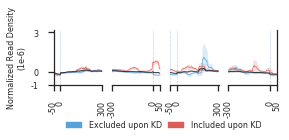

In [14]:
# plot once with the axes labels
import matplotlib.patches as mpatches

FONTSIZE=8

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

axs = [ax1, ax2, ax3, ax4]


density_plotter = Plotter._SEPlotter(lines=[density_incl, density_excl, density_bg], num_regions=4)
read_map_regions = density_plotter.plot(axs, None)

ax1.set_ylabel("Normalized Read Density\n(1e-6)", size=FONTSIZE)

# plt.tight_layout()
for ax in axs:
        ax.tick_params(labelsize=FONTSIZE)

ax1.yaxis.set_ticks([-0.000001, 0, 0.000003])
ax2.yaxis.set_ticks([-0.000001, 0, 0.000003])
ax3.yaxis.set_ticks([-0.000001, 0, 0.000003])
ax4.yaxis.set_ticks([-0.000001, 0, 0.000003])

ax1.yaxis.set_ticklabels(['-1','0','3'])

for ax in axs[1:3]:
    sns.despine(ax=ax, top=True, left=True, right=True)
    
sns.despine(ax=axs[0], top=True, left=False, right=True)
sns.despine(ax=axs[3], top=True, left=True, right=False)
    
incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Included upon KD')
excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excluded upon KD')

leg = axs[0].legend(
    bbox_to_anchor=(2.3, -0.6), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_keep_outliers.svg')


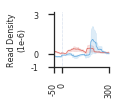

In [15]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(1*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 1, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=full_grid[0, 0])

read_map_regions = [plt.subplot()]*4

read_map_regions[2] = (plt.subplot(map_row[0]))

density_plotter = Plotter._SEPlotter(lines=[density_incl, density_excl], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)

sns.despine(ax=read_map_regions[2], top=True, left=False, right=True)

# plt.tight_layout()
for ax in read_map_regions:
        ax.tick_params(labelsize=FONTSIZE)

read_map_regions[2].yaxis.set_ticks([-0.000001, 0, 0.000003])

read_map_regions[2].yaxis.set_ticklabels(['-1','0','3'])
read_map_regions[2].yaxis.set_visible(True)
read_map_regions[2].set_ylabel("Read Density\n(1e-6)", size=FONTSIZE)
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_keep_outliers.1pane.svg')

# change conf to 0.95

In [16]:
d = get_unnormed_data(density_dir)
density_incl, density_excl, density_bg = get_lines(d, conf=0.95)

((492, 1400), 'Included upon knockdown (492 events)')
((476, 1400), 'Excluded upon knockdown (476 events)')
((2555, 1400), 'Native cassettes (2555 events)')


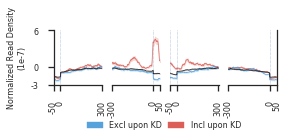

In [17]:
# plot once with the axes labels
import matplotlib.patches as mpatches

FONTSIZE=8

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

axs = [ax1, ax2, ax3, ax4]

density_plotter = Plotter._SEPlotter(lines=[density_incl, density_excl, density_bg], num_regions=4)
read_map_regions = density_plotter.plot(axs, None)

ax1.set_ylabel("Normalized Read Density\n(1e-7)", size=FONTSIZE)

# plt.tight_layout()
for ax in axs:
        ax.tick_params(labelsize=FONTSIZE)

ax1.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
ax2.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
ax3.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
ax4.yaxis.set_ticks([-0.0000003, 0, 0.0000006])

ax1.yaxis.set_ticklabels(['-3','0','6'])

for ax in axs[1:3]:
    sns.despine(ax=ax, top=True, left=True, right=True)
    
sns.despine(ax=axs[0], top=True, left=False, right=True)
sns.despine(ax=axs[3], top=True, left=True, right=False)
    
# ax1.yaxis.set_ticklabels(['-3e-7','','',0,'','','','','','6e-7'])

incl_density_patch = mpatches.Patch(color=d['included']['color'], label='Incl upon KD')
excl_density_patch = mpatches.Patch(color=d['excluded']['color'], label='Excl upon KD')

leg = axs[0].legend(
    bbox_to_anchor=(2.3, -0.6), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_remove_outliers.svg')

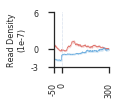

In [18]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(1*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 1, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=full_grid[0, 0])

read_map_regions = [plt.subplot()]*4

read_map_regions[2] = (plt.subplot(map_row[0]))

density_plotter = Plotter._SEPlotter(lines=[density_incl, density_excl], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)

sns.despine(ax=read_map_regions[2], top=True, left=False, right=True)

# plt.tight_layout()
for ax in read_map_regions:
        ax.tick_params(labelsize=FONTSIZE)

read_map_regions[2].yaxis.set_ticks([-0.0000003, 0, 0.0000006])

read_map_regions[2].yaxis.set_ticklabels(['-3','0','6'])
read_map_regions[2].yaxis.set_visible(True)
read_map_regions[2].set_ylabel("Read Density\n(1e-7)", size=FONTSIZE)
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_remove_outliers.1pane.svg')

# 11/10 changes
- can you combine the masked and unmasked data into one figure like we did with the 5' and full read density splicing map
- we just want to show the excluded upon KD track in the 3rd axis

In [19]:
d = get_unnormed_data(density_dir)
density_incl_conf1, density_excl_conf1, density_bg_conf1 = get_lines(d, conf=1)
density_incl_conf095, density_excl_conf095, density_bg_conf095 = get_lines(d, conf=0.95)

((492, 1400), 'Included upon knockdown (492 events)')
((476, 1400), 'Excluded upon knockdown (476 events)')
((2555, 1400), 'Native cassettes (2555 events)')
((492, 1400), 'Included upon knockdown (492 events)')
((476, 1400), 'Excluded upon knockdown (476 events)')
((2555, 1400), 'Native cassettes (2555 events)')


In [20]:
density_excl_conf1.color = '#ffaaa1'
density_incl_conf1.color = '#84a2c7'
density_excl_conf095.color = '#ff1800'
density_incl_conf095.color = '#2975d1'

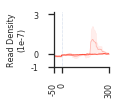

In [21]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(1*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 1, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=full_grid[0, 0])

read_map_regions = [plt.subplot()]*4

read_map_regions[2] = (plt.subplot(map_row[0]))

density_plotter = Plotter._SEPlotter(lines=[density_excl_conf1, density_excl_conf095], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)

sns.despine(ax=read_map_regions[2], top=True, left=False, right=True)

# plt.tight_layout()
for ax in read_map_regions:
        ax.tick_params(labelsize=FONTSIZE)

read_map_regions[2].yaxis.set_ticks([-0.000001, 0, 0.000003])

read_map_regions[2].yaxis.set_ticklabels(['-1','0','3'])
read_map_regions[2].yaxis.set_visible(True)
read_map_regions[2].set_ylabel("Read Density\n(1e-7)", size=FONTSIZE)
plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_remove_outliers.excluded_upon_kd.1pane.svg')

# 11/14 changes - make full figure of combined excluded w and w/o outlier removal

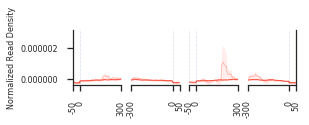

In [22]:
# plot once with the axes labels
import matplotlib.patches as mpatches

FONTSIZE=8

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

axs = [ax1, ax2, ax3, ax4]

density_plotter = Plotter._SEPlotter(lines=[density_excl_conf1, density_excl_conf095], num_regions=4)
read_map_regions = density_plotter.plot(axs, None)

ax1.set_ylabel("Normalized Read Density", size=FONTSIZE)

# plt.tight_layout()
for ax in axs:
        ax.tick_params(labelsize=FONTSIZE)

# ax1.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
# ax2.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
# ax3.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
# ax4.yaxis.set_ticks([-0.0000003, 0, 0.0000006])

# ax1.yaxis.set_ticklabels(['-3','0','6'])

for ax in axs[1:3]:
    sns.despine(ax=ax, top=True, left=True, right=True)
    
sns.despine(ax=axs[0], top=True, left=False, right=True)
sns.despine(ax=axs[3], top=True, left=True, right=False)
    
# ax1.yaxis.set_ticklabels(['-3e-7','','',0,'','','','','','6e-7'])


plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_remove_outliers.excluded_upon_kd.4pane.svg')

# 11/15 changes
- plot everything together

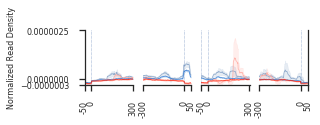

In [23]:
# plot once with the axes labels
import matplotlib.patches as mpatches

FONTSIZE=8

plt.cla()
plt.clf()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

axs = [ax1, ax2, ax3, ax4]

density_plotter = Plotter._SEPlotter(lines=[
    density_incl_conf1, density_excl_conf1, 
    density_incl_conf095, density_excl_conf095
], num_regions=4)

read_map_regions = density_plotter.plot(axs, None)

ax1.set_ylabel("Normalized Read Density", size=FONTSIZE)

# plt.tight_layout()
for ax in axs:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(-0.0000003, 0.0000025)
    
ax1.yaxis.set_ticks([-0.0000003, 0, 0.0000025])
# ax2.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
# ax3.yaxis.set_ticks([-0.0000003, 0, 0.0000006])
# ax4.yaxis.set_ticks([-0.0000003, 0, 0.0000006])

# ax1.yaxis.set_ticklabels(['-3','0','6'])

for ax in axs[1:3]:
    sns.despine(ax=ax, top=True, left=True, right=True)
    
sns.despine(ax=axs[0], top=True, left=False, right=True)
sns.despine(ax=axs[3], top=True, left=True, right=False)
    
# ax1.yaxis.set_ticklabels(['-3e-7','','',0,'','','','','','6e-7'])


plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_remove_outliers.all_conditions.4pane.svg')

# Replot the same image as above using the same gridspec (to be the same size as the rest)

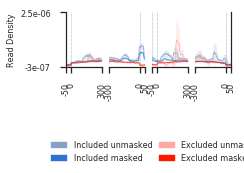

In [24]:
FONTSIZE=8
mag = 1
fig = plt.figure(figsize=(4*mag, 1*mag))
full_grid = gridspec.GridSpec(1, 4, height_ratios=[1], )

map_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[0, 1:4])

read_map_regions = []

for i in range(4):
    read_map_regions.append(plt.subplot(map_row[i:i+1]))

density_plotter = Plotter._SEPlotter(lines=[
    density_incl_conf1, density_excl_conf1, 
    density_incl_conf095, density_excl_conf095
], num_regions=4)
read_map_regions = density_plotter.plot(read_map_regions, None)

# density_plotter.renumber_axes(4, read_map_regions)
# read_plotter.renumber_axes(4, peak_map_regions)

read_map_regions[0].set_ylabel("Read Density", size=FONTSIZE)
read_map_regions[0].yaxis.set_visible(True)
read_map_regions[3].yaxis.set_visible(False)


read_ymin = -0.0000003
read_ymax = 0.0000025


for ax in read_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(read_ymin, read_ymax)


read_map_regions[0].yaxis.set_ticks([read_ymin, read_ymax])
# read_map_regions[0].yaxis.set_ticklabels([read_ymin*1000, read_ymax*1000])
read_map_regions[0].yaxis.set_ticklabels([read_ymin, read_ymax])

sns.despine(ax=read_map_regions[0], top=True, left=False, right=True)

# despine stuff
for region in read_map_regions[1:3]:
    sns.despine(ax=region, top=True, left=True, right=True, bottom=False)
    region.yaxis.set_visible(False)

sns.despine(ax=read_map_regions[0], top=True, left=False, right=True, bottom=False)
sns.despine(ax=read_map_regions[3], top=True, left=True, right=False, bottom=False)

excl_unmasked = mpatches.Patch(color=density_excl_conf1.color, label='Excluded unmasked')
excl_masked = mpatches.Patch(color=density_excl_conf095.color, label='Excluded masked')
incl_unmasked = mpatches.Patch(color=density_incl_conf1.color, label='Included unmasked')
incl_masked = mpatches.Patch(color=density_incl_conf095.color, label='Included masked')

leg = read_map_regions[0].legend(
    bbox_to_anchor=(2.5, -1.3), loc=1, mode="expand",
    handles=[excl_unmasked, excl_masked, incl_unmasked, incl_masked],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)

plt.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/203_02_HNRNPC_splicemap_remove_outliers.all_conditions.4pane.svg')